In [1]:
#importing basic libraries
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style 

import os
import warnings 
warnings.filterwarnings("ignore")

In [2]:
import re #regular expression for data cleaning 
from sklearn.feature_extraction.text import CountVectorizer #feature extraction
import nltk #natural language toolkit
from nltk.corpus import stopwords #stopwords
from nltk.stem import WordNetLemmatizer #lemmatizing words

In [3]:

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [4]:
pd.options.display.max_rows = 10

In [5]:
data = pd.read_csv("C:\\Users\\user\\Downloads\\archive (5)\\K8 Reviews v0.2.CSV")

In [6]:
data.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [7]:
rows, columns = data.shape
print('Rows = ' , rows, 'Columns =' , columns )

Rows =  14675 Columns = 2


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14675 entries, 0 to 14674
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  14675 non-null  int64 
 1   review     14675 non-null  object
dtypes: int64(1), object(1)
memory usage: 229.4+ KB


In [9]:
data.isna().sum()

sentiment    0
review       0
dtype: int64

In [10]:
data['sentiment'].value_counts(normalize = True)

0    0.52552
1    0.47448
Name: sentiment, dtype: float64

In [11]:
duplicate = data[data.duplicated(keep = 'last')] 
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,sentiment,review
3,1,Good
10,0,Wrost
19,1,Good smartphone
20,1,good
46,0,Poor
...,...,...
14529,1,Good
14530,0,Good
14547,0,Waste of money
14553,0,Good


In [12]:
double_data = duplicate[duplicate['review'].str.len() > 60]

In [13]:
pd.options.display.max_colwidth = 1000 # prints 
double_data

,sentiment,review
587,1,"Superb product. Few of the feature are awesome. Duel camera, front 13mp camera, back and front flash, dedicated music button, dedicated memory card slot, free transparent case and split window for multitasking. These are some feature i like the product in my budget."
3802,0,"It's the jack of all trades but king of none. Battery back up could have been better if they used some other processor. Battery drains quite fast. Camera is better than average. And I think there is no option to keep external media as your ringtone. Only custom build ringtones available to set as your ringtone. Kinda bums me out.Update after 3 day use:Battery back up is really horrible, normal usage like whatsapp and Instagram browsing consumes more than 25% battery in an hour or so.Then there is turbocharging issue, it starts with fast charging then after 10-20 minutes,depending upon mood, rate decreases, it took 7 hours to charge it by 40% in total.Would really appreciate if Amazon could take this matter seriously and take it up with Lenovo and return the money of its customers for defective models. I personally would not trust my 14K bucks with Lenovo or Moto from this point on."
4435,0,"Hello,The phone starts resetting itself randomly. This issue starts after after 3 days of use, especially when you use it for longer time like watching a you tube video for an hour or two. The issue starts to repeat after 1 or 2 days, then I tried few option mentioned in Lenovo help APP which is pre-installed(I am feeling like a stupid for having done this) , after that for 4 or 5 days it didn't show this issue. Now it back with a bang and almost resets itself every night. Use the phone in night, then lock it and keep aside and when you take the phone again in the morning, boom, it is dead already. And when you manually power-on there is enough juice left in the battery. Not sure what to do with this kind of issue, the phone is absolutely useless.When I approached amazon for return, they are quoting policy and suggest me that I should run pillar to post to get problem rectified (not sure even it is rectifiable issue), The below Amazon's tagline tag-line sounds funny"" Earth's Most C..."
5951,0,"Over Heating Issue while light usage like just in internet connection, and always warm while connected to internet. this update is After usage of 10 days. Dont prefer this one."
6223,0,"Over Heating Issue while light usage like just in internet connection, and always warm while connected to internet. this update is After usage of 10 days. Dont prefer this one."
9277,0,"Hello,The phone starts resetting itself randomly. This issue starts after after 3 days of use, especially when you use it for longer time like watching a you tube video for an hour or two. The issue starts to repeat after 1 or 2 days, then I tried few option mentioned in Lenovo help APP which is pre-installed(I am feeling like a stupid for having done this) , after that for 4 or 5 days it didn't show this issue. Now it back with a bang and almost resets itself every night. Use the phone in night, then lock it and keep aside and when you take the phone again in the morning, boom, it is dead already. And when you manually power-on there is enough juice left in the battery. Not sure what to do with this kind of issue, the phone is absolutely useless.When I approached amazon for return, they are quoting policy and suggest me that I should run pillar to post to get problem rectified (not sure even it is rectifiable issue), The below Amazon's tagline tag-line sounds funny"" Earth's Most C..."
9428,1,Great experience with tis amazing product from lenovo.it is equipped with almost every features that a smartphone required.deca core processor long lasting battery and 64GB internal memory with 4GB RAM is just awesome.I would certainly recommend this phone for users having usage and game lovers
12115,1,Great experience with tis amazing product from lenovo.it is equipped with almost every features that

In [14]:
double_data.index.values.tolist()

[587, 3802, 4435, 5951, 6223, 9277, 9428, 12115]

In [15]:

data.drop(data.index[double_data.index.values.tolist()], inplace=True)

# Normalize casings 

In [16]:
review_lc = [i.lower() for i in data['review']]

In [17]:
# removing punctuation
import string
nopunc = (str.maketrans('','',string.punctuation))
review_nopunc = [w.translate(nopunc) for w in review_lc]

In [18]:
#removing emojis
from cleantext import clean
review_no_emoji = [clean(text, no_emoji=True) for text in review_nopunc]


Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


# Tokenize 

In [19]:
from nltk import word_tokenize
review_tokens = [nltk.word_tokenize(i) for i in review_no_emoji]

In [20]:
from nltk.corpus import stopwords
SW = stopwords.words("english") #stopwords
SW.extend(['phone','lenovo','mobile'])
SW_negation = ['no','out','down','below','against','nor','not','ain','aren',"aren't",'couldn',"couldn't",'didn',"didn't",'doesn',"doesn't",'hadn',"hadn't",'hasn',"hasn't",'haven',"haven't",'isn',"isn't",'mightn',"mightn't",'mustn',"mustn't",'needn', "needn't",'shan',"shan't",'shouldn',"shouldn't",'wasn',"wasn't",'weren',"weren't",'won',"won't",'wouldn',"wouldn't"]

SW_updated = [i for i in SW if i not in SW_negation]
review_no_SW  = []
for sentence_list in review_tokens:
    word_list = []
    for word in sentence_list: 
        if word not in SW_updated : 
            word_list.append(word)
    review_no_SW .append(word_list)

In [21]:
from nltk import pos_tag
review_pos_tag = [nltk.pos_tag(i) for i in review_no_SW if not str(i).isdigit()]

In [22]:
pd.options.display.max_colwidth = 10
review_pos_tag[0] # Just for understanding how list is

[('good', 'JJ'), ('need', 'NN'), ('updates', 'NNS'), ('improvements', 'NNS')]

In [23]:
def Get_Nouns(POSTags):
    Noun_Forms=['NN','NNP','NNS','NNPS']
    words = [word for word,tag in POSTags if tag in Noun_Forms]
    return words

In [24]:
review_nouns = [Get_Nouns(i) for i in review_pos_tag]

In [25]:
review_nouns[0:3]

[['need', 'updates', 'improvements'],
 ['hell',
  'backup',
  'hours',
  'uses',
  'lie',
  'amazon',
  'battery',
  'booster',
  'charger',
  'hours',
  'usplease',
  'dont'],
 ['cash']]

In [26]:
def Get_Verbs(POSTags):
    Verb_Forms=['VB','VBP','VBZ','VBG','VBD','VBN']
    words = [word for word,tag in POSTags if tag in Verb_Forms]
    return words

In [27]:
review_verbs = [Get_Verbs(i) for i in review_pos_tag]

# Lemmatize.

In [28]:
from nltk.stem import wordnet
lem = wordnet.WordNetLemmatizer()

def lem_list_of_words(words_list): 
    return [lem.lemmatize(i,pos="n") for i in words_list]

review_lem = [lem_list_of_words(words_list) for words_list in review_nouns]
review_lem[0:3]

[['need', 'update', 'improvement'],
 ['hell',
  'backup',
  'hour',
  'us',
  'lie',
  'amazon',
  'battery',
  'booster',
  'charger',
  'hour',
  'usplease',
  'dont'],
 ['cash']]

In [29]:
def lem_list_of_verb_words(words_list): 
    return [lem.lemmatize(i, pos ="v") for i in words_list]

review_lem_verb = [lem_list_of_verb_words(words_list) for words_list in review_verbs]

# Remove stopwords and punctuation 

In [30]:
word_list = [word for pos_tag_tuple_list in review_pos_tag for word,pos_tag in pos_tag_tuple_list]

In [31]:
nouns_list = [word for noun_sent_list in review_lem for word in noun_sent_list]
verb_list =  [word for verb_sent_list in review_lem_verb for word in verb_sent_list]

<Figure size 1440x720 with 0 Axes>

<BarContainer object of 20 artists>

Text(0.5, 1.0, '20 most frequently used words')

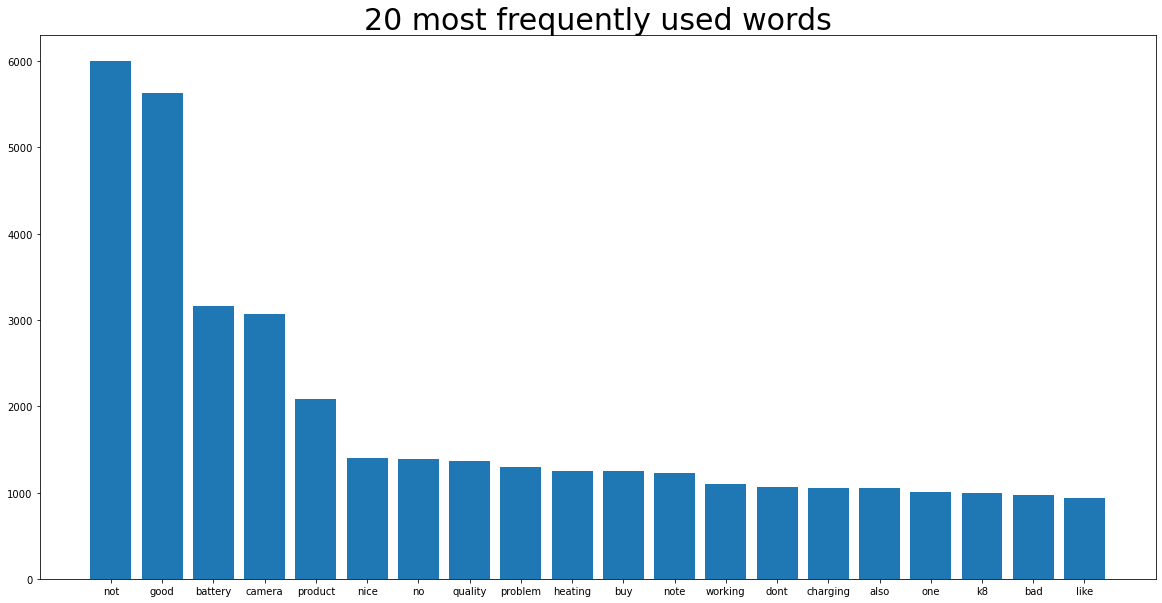

In [32]:
from collections import Counter
word_freq_cnt = Counter(word_list)
# Plotting the most commonly used words:
import matplotlib.pyplot as plt
%matplotlib inline
words=[]
values=[]
for item, frequency in word_freq_cnt.most_common(20):
    words.append(item) 
    values.append(frequency)
plt.figure(figsize= (20,10))
plt.bar(words, values)
plt.title('20 most frequently used words', size=30) 
plt.show()

<Figure size 1440x720 with 0 Axes>

<BarContainer object of 15 artists>

Text(0.5, 1.0, '15 most frequently used Nouns')

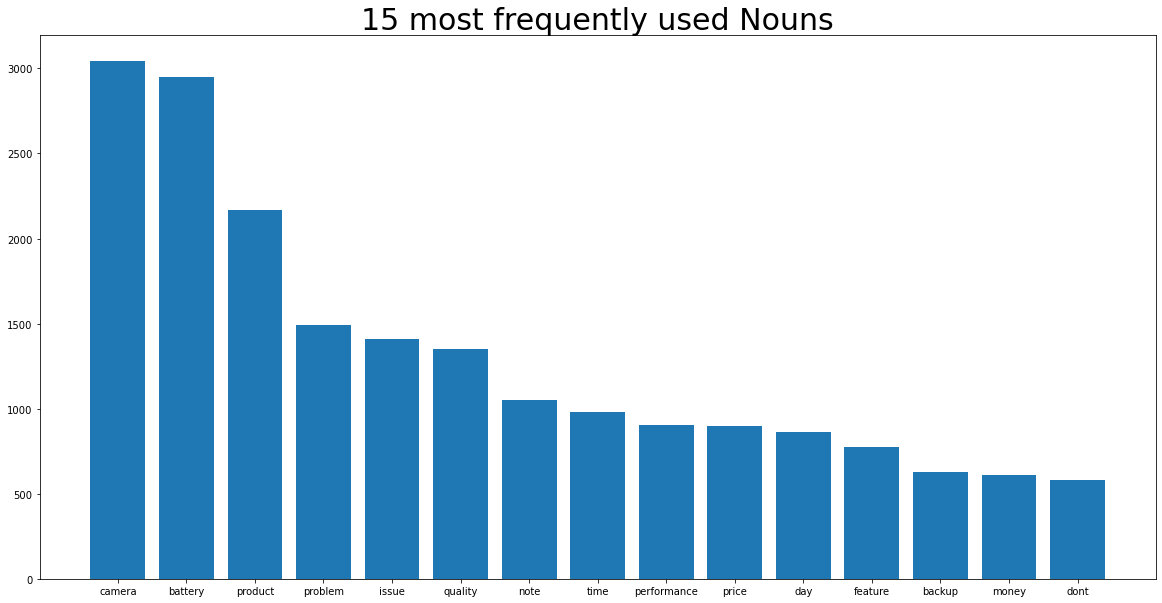

In [33]:
noun_freq_cnt = Counter(nouns_list)
# Plotting the most commonly used nouns:
import matplotlib.pyplot as plt
%matplotlib inline
words=[]
values=[]
for item, frequency in noun_freq_cnt.most_common(15):
    words.append(item) 
    values.append(frequency)
plt.figure(figsize= (20,10))
plt.bar(words, values)
plt.title('15 most frequently used Nouns', size=30) 
plt.show()

<Figure size 1440x720 with 0 Axes>

<BarContainer object of 15 artists>

Text(0.5, 1.0, '15 most frequently Verbs')

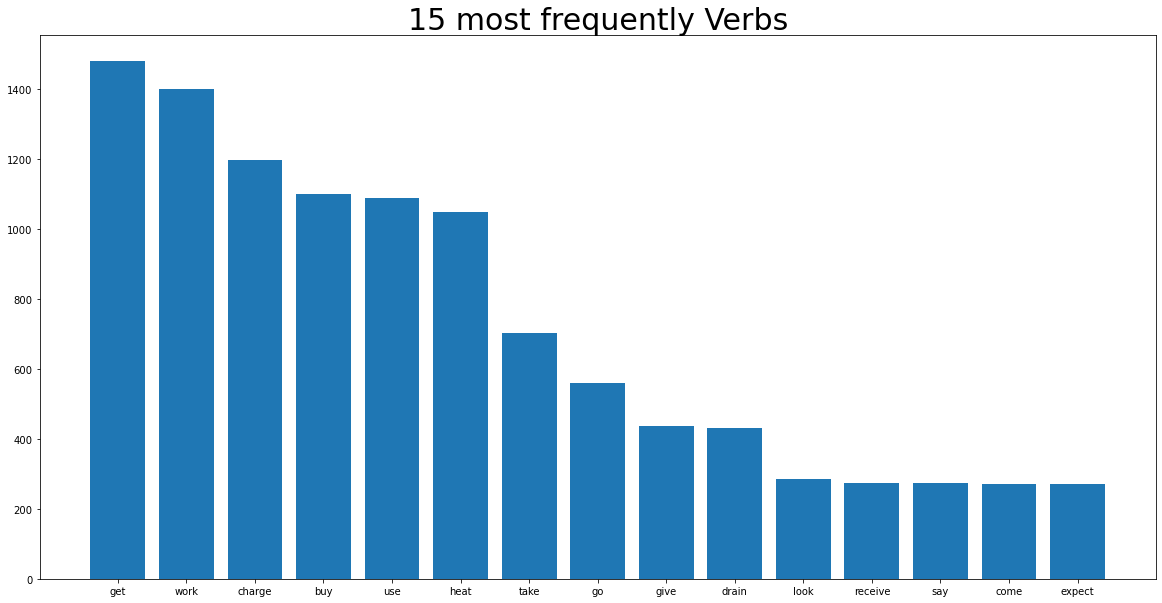

In [34]:
verb_freq_cnt = Counter(verb_list)
# Plotting the most commonly used nouns:
import matplotlib.pyplot as plt
%matplotlib inline
words=[]
values=[]
for item, frequency in verb_freq_cnt.most_common(15):
    words.append(item) 
    values.append(frequency)
plt.figure(figsize= (20,10))
plt.bar(words, values)
plt.title('15 most frequently Verbs', size=30) 
plt.show()

In [35]:
#Create a topic model using LDA

In [36]:
import gensim.corpora as corpora


In [37]:
from gensim import models

In [38]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


'C:\Users\user\Downloads\New' is not recognized as an internal or external command,
operable program or batch file.


In [39]:
import gensim
from gensim import models
from gensim.models import Word2Vec, KeyedVectors


In [40]:
# Creating dictionary and applying filter to select few words
dic_res = gensim.corpora.Dictionary(review_lem) #Creates a dictionary for all words in Corpora
dic_res.filter_extremes(no_below = 25, # Keep tokens which are contained in at least no_below documents.
                        no_above = 0.8, # Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).
                        keep_n = None) #Keep only the first keep_n most frequent tokens.

# Convert document into the bag-of-words (BoW) format = list of (token_id, token_count) tuples.
bow_corpus = [dic_res.doc2bow(doc) for doc in review_lem] 
bow_corpus[0:3] # corpus for input data

[[(0, 1), (1, 1), (2, 1)],
 [(3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2)],
 [(10, 1)]]

In [41]:
print("No of words in dictionary after filtering is: {}".format(len(dic_res)))

No of words in dictionary after filtering is: 384


In [42]:
# Demonstrate how words are connected to numbers in dictionary after filtering
for k, v in dic_res.iteritems():
    if k<10:
        print(k, v) 

0 improvement
1 need
2 update
3 amazon
4 backup
5 battery
6 charger
7 dont
8 hell
9 hour


In [43]:
lda_model =  gensim.models.LdaMulticore(bow_corpus, num_topics = 12,id2word = dic_res, iterations= 5000, passes = 10,workers = 2)
from gensim.models import CoherenceModel
coherence_model = CoherenceModel(model= lda_model,texts= review_lem,dictionary=dic_res,coherence='u_mass')
print('Coherence score with 12 Topics is: ', coherence_model.get_coherence())

Coherence score with 12 Topics is:  -5.239656085946675


In [44]:
# Generating words of  Each topic:
for idx, topic in lda_model.print_topics(-1):
            print("Topic: {} \nWords: {}".format(idx, topic ))
            print("\n")      

Topic: 0 
Words: 0.254*"battery" + 0.116*"backup" + 0.085*"camera" + 0.067*"use" + 0.040*"day" + 0.033*"drain" + 0.027*"performance" + 0.021*"usage" + 0.019*"mah" + 0.018*"fast"


Topic: 1 
Words: 0.121*"money" + 0.065*"call" + 0.060*"value" + 0.038*"star" + 0.034*"system" + 0.030*"processor" + 0.028*"core" + 0.027*"update" + 0.025*"voice" + 0.022*"killer"


Topic: 2 
Words: 0.175*"problem" + 0.095*"heating" + 0.090*"performance" + 0.072*"heat" + 0.064*"month" + 0.061*"charger" + 0.041*"handset" + 0.041*"excellent" + 0.038*"super" + 0.036*"box"


Topic: 3 
Words: 0.093*"device" + 0.075*"camera" + 0.051*"quality" + 0.043*"work" + 0.040*"ram" + 0.038*"bit" + 0.030*"earphone" + 0.029*"picture" + 0.026*"look" + 0.024*"im"


Topic: 4 
Words: 0.243*"price" + 0.092*"range" + 0.079*"waste" + 0.077*"dont" + 0.073*"buy" + 0.060*"everything" + 0.048*"budget" + 0.038*"money" + 0.035*"smartphone" + 0.035*"ok"


Topic: 5 
Words: 0.401*"product" + 0.074*"service" + 0.057*"amazon" + 0.031*"issue" + 0.

In [45]:
#Analyze the topic


In [46]:
!pip install pyLDAvis

In [47]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [48]:
import gensim
import pickle 
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(lda_model, bow_corpus, dic_res)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.292025 -0.024274       1        1  10.426575
10    -0.122517  0.138062       2        1   9.430825
11    -0.096270 -0.212624       3        1   9.309845
0     -0.188634  0.157374       4        1   9.215877
7      0.015455 -0.230462       5        1   9.030487
...         ...       ...     ...      ...        ...
6      0.064034  0.243436       8        1   8.891847
3     -0.175284 -0.030047       9        1   6.737813
1      0.084003 -0.127884      10        1   6.736778
4      0.122231 -0.133324      11        1   6.380804
2      0.137321  0.232125      12        1   5.964540

[12 rows x 5 columns], topic_info=        Term       Freq      Total Category  logprob  loglift
37   product  2073.0...  2073.0...  Default  30.0000  30.0000
5    battery  2926.0...  2926.0...  Default  29.0000  29.0000
44    camera  2990.0...  2990.0...  Default  28.0000  28.0000
51     price  908.00...  908.00...  Default  27.0000  27.0000
63   quality  1282.0...  1282.0...  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
8       hell   4.762372  34.249975  Topic12  -6.5870   0.8464
107    turbo  30.908853  228.13...  Topic12  -4.7167   0.8204
54     issue  116.81...  1338.9...  Topic12  -3.3872   0.3803
126   please  28.142691  266.91...  Topic12  -4.8105   0.5697
143    phone  17.258436  302.18...  Topic12  -5.2995  -0.0434

[505 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
3         5  0.030205  amazon
3         6  0.310678  amazon
3         7  0.636458  amazon
3         9  0.002157  amazon
3        10  0.012945  amazon
...     ...       ...     ...
21        4  0.014196    year
21        6  0.070979    year
21        7  0.127762    year
21        8  0.766572    year
21       10  0.014196    year

[1238 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 11, 12, 1, 8, 10, 6, 7, 4, 2, 5, 3])

In [49]:
pyLDAvis.save_html(LDAvis_prepared, 'LDA_model_vis'+'.html')

In [50]:
def compute_coherence_score(corpus,id2word,k):
    lda_model = gensim.models.LdaMulticore(corpus = corpus, num_topics = k,id2word =dic_res, passes=10, random_state= 1607, iterations= 50, per_word_topics= True)
    coherence_model_lda = CoherenceModel(model= lda_model, texts= review_lem,dictionary= dic_res,coherence='u_mass') 
    coherence_score = coherence_model_lda.get_coherence()
    return coherence_score

In [51]:
cs=[]
for i in range(4,11):
    score = compute_coherence_score(corpus=bow_corpus,id2word=dic_res,k=i) 
    print('\nCoherence score with ', i, 'Topics is: ', score ) 
    cs.append((i,score))


Coherence score with  4 Topics is:  -3.3707309717310814

Coherence score with  5 Topics is:  -3.443789429631301

Coherence score with  6 Topics is:  -3.4940337245365303

Coherence score with  7 Topics is:  -3.564678047380706

Coherence score with  8 Topics is:  -4.220653907580454

Coherence score with  9 Topics is:  -3.9333703959073825

Coherence score with  10 Topics is:  -4.277448221266636


Text(0.5, 1.0, 'Coherence Score vs  Number of Topics')

Text(0.5, 0, 'Number of Topics')

Text(0, 0.5, 'Coherence Score')

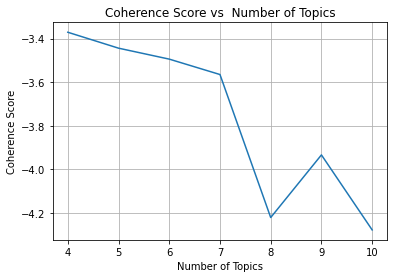

In [52]:
x = [val[0] for val in cs]
y= [val[1] for val in cs]
plt.plot(x,y)
plt.title('Coherence Score vs  Number of Topics') 
plt.grid(True)
plt.xlabel('Number of Topics') 
plt.ylabel('Coherence Score') 
plt.show()

In [53]:
from operator import itemgetter
tps = max(cs, key=itemgetter(1))[0]
print('Optimum number of topics for highest Coherence score is: ', tps)

Optimum number of topics for highest Coherence score is:  4


In [54]:
lda_model_final = gensim.models.LdaMulticore(corpus = bow_corpus, num_topics = tps,id2word = dic_res, passes=10,random_state = 1607, iterations= 50, per_word_topics = True)
coherence_model_lda_final = CoherenceModel(model= lda_model_final, texts= review_lem,dictionary= dic_res,coherence='u_mass') 
coherence_score_final = coherence_model_lda_final.get_coherence()
print('Coherence score for ',tps,' Topics is: ', coherence_score_final)

Coherence score for  4  Topics is:  -3.372468501016443


In [55]:
for idx, topic in lda_model_final.print_topics(-1):
            print("Topic: {} \nWords: {}".format(idx, topic ))
            print("\n")   

Topic: 0 
Words: 0.150*"product" + 0.127*"camera" + 0.040*"quality" + 0.034*"performance" + 0.023*"price" + 0.023*"software" + 0.020*"superb" + 0.018*"range" + 0.018*"awesome" + 0.017*"everything"


Topic: 1 
Words: 0.049*"feature" + 0.047*"price" + 0.043*"money" + 0.028*"screen" + 0.025*"quality" + 0.021*"buy" + 0.021*"dont" + 0.021*"waste" + 0.018*"doesnt" + 0.018*"day"


Topic: 2 
Words: 0.114*"battery" + 0.052*"camera" + 0.031*"note" + 0.029*"time" + 0.027*"day" + 0.024*"quality" + 0.024*"service" + 0.022*"hour" + 0.020*"backup" + 0.019*"amazon"


Topic: 3 
Words: 0.101*"problem" + 0.093*"issue" + 0.049*"battery" + 0.035*"network" + 0.035*"month" + 0.031*"charger" + 0.030*"heating" + 0.024*"time" + 0.020*"charge" + 0.018*"call"




In [56]:
topic_words = {}

for idx, topic in lda_model_final.print_topics(-1): 
    temp = []
    for item in topic.split('+'):
        item_alpha = [letter for letter in item if letter.isalpha()]
        temp.append("".join(item_alpha))    
    topic_words[('Topic_'+str(idx+1))] = temp

topic_table = pd.DataFrame(topic_words)    
topic_table.index = ['Word_'+str(i+1) for i in range(topic_table.shape[0])]
topic_table

,Topic_1,Topic_2,Topic_3,Topic_4
Word_1,product,feature,battery,problem
Word_2,camera,price,camera,issue
Word_3,quality,money,note,battery
Word_4,perfor...,screen,time,network
Word_5,price,quality,day,month
Word_6,software,buy,quality,charger
Word_7,superb,dont,service,heating
Word_8,range,waste,hour,time
Word_9,awesome,doesnt,backup,charge
Word_10,everyt...,day,amazon,call


In [57]:
x = lda_model_final.show_topics(formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]

for topic, words in topics_words:
    print(str(topic)+"::"+str(words))
    
print()

0::['product', 'camera', 'quality', 'performance', 'price', 'software', 'superb', 'range', 'awesome', 'everything']
1::['feature', 'price', 'money', 'screen', 'quality', 'buy', 'dont', 'waste', 'doesnt', 'day']
2::['battery', 'camera', 'note', 'time', 'day', 'quality', 'service', 'hour', 'backup', 'amazon']
3::['problem', 'issue', 'battery', 'network', 'month', 'charger', 'heating', 'time', 'charge', 'call']



In [58]:

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(lda_model_final, bow_corpus, dic_res)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.065585 -0.041438       1        1  32.281066
0     -0.190684 -0.150414       2        1  22.815499
3      0.238974 -0.011667       3        1  22.735265
1     -0.113875  0.203518       4        1  22.168170, topic_info=        Term       Freq      Total Category  logprob  loglift
37   product  2085.0...  2085.0...  Default  30.0000  30.0000
11   problem  1436.0...  1436.0...  Default  29.0000  29.0000
54     issue  1336.0...  1336.0...  Default  28.0000  28.0000
44    camera  2983.0...  2983.0...  Default  27.0000  27.0000
5    battery  2988.0...  2988.0...  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
35      card  91.388544  148.21...   Topic4  -4.9455   1.0230
105   return  116.64...  365.89...   Topic4  -4.7014   0.3634
44    camera  197.71...  2983.8...   Topic4  -4.1738  -1.2076
16      note  128.62...  1065.6...   Topic4  -4.6037  -0.6080
78     speed  103.99...  332.49...   Topic4  -4.8162   0.3442

[264 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
3         1  0.855939     amazon
3         2  0.059372     amazon
3         3  0.009895     amazon
3         4  0.074214     amazon
286       1  0.294406        app
...     ...       ...        ...
65        3  0.288827       work
65        4  0.546430       work
237       2  0.014692      worth
237       4  0.984376      worth
362       3  0.975812  yesterday

[633 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2])

In [59]:
pip install wordcloud  

Note: you may need to restart the kernel to use updated packages.


'C:\Users\user\Downloads\New' is not recognized as an internal or external command,
operable program or batch file.


<Figure size 1440x2880 with 0 Axes>

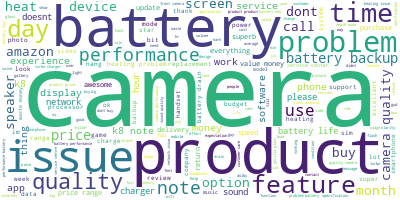

<Figure size 1440x2880 with 0 Axes>

In [61]:
from wordcloud import WordCloud # Import the wordcloud library
long_string = ','.join(nouns_list) # Join the different processed titles together.
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue') # Create a WordCloud object
plt.figure(figsize=[20,40])
wordcloud.generate(long_string) # Generate a word cloud
wordcloud.to_image()# Visualize the word cloud

In [62]:
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

lda_model = gensim.models.ldamodel.LdaModel(corpus=bow_corpus,
                                           id2word=dic_res,
                                           num_topics=tps, 
                                           random_state=1607,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[bow_corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 11184 samples in 0.030s...
[t-SNE] Computed neighbors for 11184 samples in 0.215s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11184
[t-SNE] Computed conditional probabilities for sample 2000 / 11184
[t-SNE] Computed conditional probabilities for sample 3000 / 11184
[t-SNE] Computed conditional probabilities for sample 4000 / 11184
[t-SNE] Computed conditional probabilities for sample 5000 / 11184
[t-SNE] Computed conditional probabilities for sample 6000 / 11184
[t-SNE] Computed conditional probabilities for sample 7000 / 11184
[t-SNE] Computed conditional probabilities for sample 8000 / 11184
[t-SNE] Computed conditional probabilities for sample 9000 / 11184
[t-SNE] Computed conditional probabilities for sample 10000 / 11184
[t-SNE] Computed conditional probabilities for sample 11000 / 11184
[t-SNE] Computed conditional probabilities for sample 11184 / 11184
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence

Loading BokehJS ...

In [63]:
import matplotlib.colors as mcolors
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(tps), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

GlyphRenderer(id='1039', ...)